In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from io import BytesIO
from google.colab import files

In [ ]:
# Load dan siapkan dataset MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Membuat model neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

# Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Melatih model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8597 - loss: 0.4863
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9559 - loss: 0.1483
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9689 - loss: 0.1047
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9728 - loss: 0.0886
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9767 - loss: 0.0747


In [ ]:
# Evaluasi model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

# membuat model untuk prediksi probabilitas
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

313/313 - 1s - 2ms/step - accuracy: 0.9776 - loss: 0.0712

Test accuracy: 0.9775999784469604


In [ ]:
# Fungsi untuk membuat prediksi dan menampilkan hasil gambar
def predict_and_show_image(input_number):
    if 0 <= input_number < 10:
        # ambil indeks pertama dari angka yang dipilih dalam data uji
        idx = np.where(y_test == input_number)[0][0]
        image = x_test[idx]

        # Prediksi probabilitas untuk gambar
        prediction = probability_model(np.array([image]))

        # Menampilkan gambar
        plt.imshow(image, cmap='gray')
        plt.title(f'Predicted Number: {np.argmax(prediction)}')
        plt.axis('off')
        plt.show()

        print(f"Model prediction probabilities for each digit (0-9):\n{prediction.numpy()}")
    else:
        print("Masukkan angka antara 0-9.")

Masukkan angka antara 0-9: 7


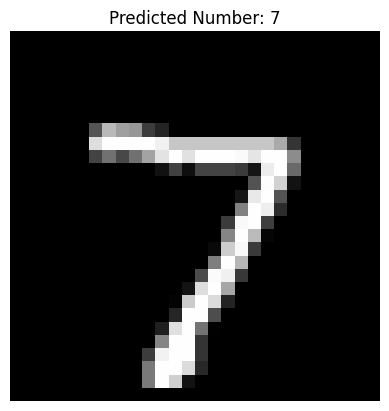

Model prediction probabilities for each digit (0-9):
[[3.5638489e-08 2.3003477e-09 6.2888912e-06 3.5025878e-05 2.4778092e-12
  5.6527650e-08 5.5305212e-13 9.9995780e-01 6.4052145e-08 7.1827037e-07]]


In [ ]:
# Contoh penggunaan fungsi
input_number = int(input("Masukkan angka antara 0-9: "))
predict_and_show_image(input_number)

In [ ]:
# Fungsi untuk prediksi dari gambar masukan
def predict_from_uploaded_image():
    print("Upload gambar untuk prediksi (file harus berupa gambar tulisan tangan angka):")
    uploaded = files.upload()
    for file_name in uploaded.keys():
        # Load gambar dari upload
        img = Image.open(BytesIO(uploaded[file_name])).convert('L')

        # Inversi warna jika latar belakang hitam
        img = ImageOps.invert(img)

        # Resize gambar ke 28x28
        img = img.resize((28, 28))

        # Normalisasi nilai piksel ke rentang [0, 1]
        img_array = np.array(img) / 255.0

        # Reshape gambar ke format (1, 28, 28)
        img_array = img_array.reshape(1, 28, 28)

        # Prediksi angka
        prediction = probability_model(img_array)

        # Menampilkan gambar dan hasil prediksi
        plt.imshow(img_array.reshape(28, 28), cmap='gray')
        plt.title(f'Predicted Number: {np.argmax(prediction)}')
        plt.axis('off')
        plt.show()

        print(f"Model prediction probabilities for each digit (0-9):\n{prediction.numpy()}")

Upload gambar untuk prediksi (file harus berupa gambar tulisan tangan angka):


Saving 5.png.jpg to 5.png (3).jpg


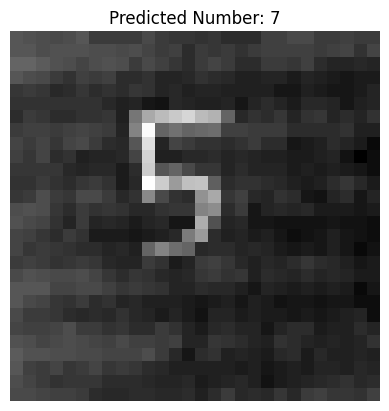

Model prediction probabilities for each digit (0-9):
[[1.5209886e-04 1.2032693e-05 1.5708910e-01 3.4590548e-01 3.5406352e-12
  6.5857805e-03 1.1771815e-03 4.8902947e-01 4.8545611e-05 4.1258116e-07]]


In [ ]:
# Prediksi dari gambar masukan (upload file)
predict_from_uploaded_image()